# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [37]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject_copy as mpc

#matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We consider  the following model of inflation and bnp.

<!---
it looks like a mess because I don't know how to indent, "&nbsp;" is equal to one space.
-->
|||
|:---|---|
|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AD.   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\hat{y}_t = - \alpha \hat{\pi}_t$   |
|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AS.   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\hat{\pi}_t = \hat{\pi}_{t-1} + \gamma \hat{y_t}$   |


# Steady state

We use sympy to find the steady state

In [8]:
# Defining the symbols
yhat_t, yhat_t1, alpha, pihat_t, pihat_t1, gamma = sm.symbols('yhat_t yhat_t1 alpha pihat_t pihat_t1 gamma')

In [9]:
# Defining the equilibrium
# the EQ for pi is found by inserting AD into AS
ss1 = sm.Eq(pihat_t,(pihat_t1-gamma*alpha*pihat_t))
# the EQ for y is found by inserting AS into AD
ss2 = sm.Eq(yhat_t,(-alpha*(pihat_t+gamma*yhat_t)))

In [10]:
#solving the model
sspi = sm.solve(ss1,pihat_t)
ssy = sm.solve(ss2,pihat_t)
print(sspi)
print(ssy)

[pihat_t1/(alpha*gamma + 1)]
[-gamma*yhat_t - yhat_t/alpha]


In [11]:
#turning the steady states into a Python function
ss1_func = sm.lambdify((pihat_t, gamma, alpha),sspi)
ss2_func = sm.lambdify((pihat_t, gamma, yhat_t),ssy)

## Analytical solution

In [12]:
#Defining values
pi_t1 = 10
gamma = 0.1
ybar = 10
pistar = 20
alpha = 0.33

def AS(y_t):
    return pi_t1 + gamma*(y_t - ybar)
def obj(y_t):
    return alpha * (AS(y_t) - pistar)

In [13]:
#Becuase of unforseen consequenses the inflation higher than the equilibrium.

optimum = mpc.solve_for_ss(pi_t1, gamma, ybar, pistar, alpha)

In [14]:
print(optimum.x[0])
print(AS(optimum.x[0]))

110.00000000006985
20.000000000006985


In [54]:
#grids:
x1_vec = []
obj_vec = []

In [50]:
#defining a function to collect information from each step of a solver
def collect(x):
    
    # globals used to keep track across iterations
    global evals # set evals = 0 before calling optimizer
    global x0
    global x1s
    global fs
    
    # a. initialize list
    if evals == 0:
        x1s = [x[0]] 
        fs = [obj(x)]
        
    # b. append trial values
    x1s.append(x[0])
    fs.append(obj(x))
    
    # c. increment number of evaluations
    evals += 1

In [51]:
#defining a function for plotting the steps of the solver
def contour():
    
    global evals
    global x1s
    global fs
    
    # a. contour plot
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    levels = [1e-6,5*1e-6,1e-5,5*1e-5,1e-4,5*1e-4,1e-3,5*1e-3,1e-2,5*1e-2,1,2,4,6,8,12,16,20]
    cs = ax.contour(x1_grid,obj_grid,levels=levels,cmap=cm.jet)
    fig.colorbar(cs)
    ax.plot(x1s,fs,'-o',ms=4,color='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('function value')

In [52]:
def solve_collect(pi_t1, gamma, ybar, pistar, alpha):
    # define objective function
    def AS(y_t):
        return pi_t1 + gamma*(y_t - ybar)
    def obj(y_t):
        return alpha * (AS(y_t) - pistar)

    #def constraints
    con = lambda y_t: alpha * (AS(y_t) - pistar)
    cons = ({'type': 'ineq', 'fun': con})
    # call optimizer
    #result = optimize.minimize_scalar(obj, bounds=(0,100), method='bounded')
    result = optimize.minimize(obj,1, method='SLSQP', constraints = cons, callback=collect)
    return result

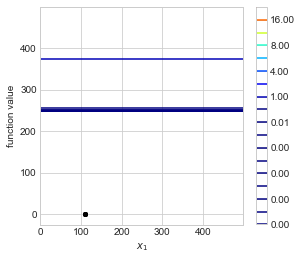

In [53]:
evals = 0
solve_collect(pi_t1, gamma, ybar, pistar, alpha)
contour()

For later use, we turn the solution into a **Python funciton**

In [5]:
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

## Numerical solution

We can re-write the equation for the steady state capital per capita as

\\[ 0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} \\]

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by a **bisection method**.

Define the model **parameters**:

In [6]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

**Solve numerically** for the steady state:

In [7]:
solution = modelproject.solve_for_ss(s,g,n,alpha,delta)

print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')
print(f' numerical solution is: {solution.root:.3f}')

analytical solution is: 1.904
 numerical solution is: 1.904


# Further analysis

ADD FURTHER ANALYSIS, VISUALIZATIONS AND EXTENSIONS.

# Conclusion

ADD CONCISE CONCLUSION.